In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
df = '/content/drive/MyDrive/NSU_Courses/CSE/CSE499A';
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/NSU_Courses/CSE/CSE499A/cuet_dataset.xlsx')
df.head()

Mounted at /content/drive


,Unnamed: 0,cleaned,classes,labels
0,0,মেডিকেলে এসে ঠিক ফ্যামিলির ফটো ফ্রেম এর মতো মন...,sadness,1
1,1,অনেক দিন পর অন্য রকম অনুভূতি হচ্ছে কেননা আমার...,sadness,1
2,2,আগে যতোটা বেশি পছন্দ করতাম দুশ্চরিত্রা মিথিলা ...,disgust,3
3,3,মাঝে মাঝে মনে হয় তোমাকে চাওয়াটা অনেক ভুল হয়ত ভ...,sadness,1
4,4,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,5


In [2]:
df.dropna(inplace=True)
df["classes"].value_counts()

disgust     1553
sadness     1190
joy         1142
fear         872
anger        759
surprise     727
Name: classes, dtype: int64

In [28]:
text = df['cleaned'].values.tolist()
label = df['classes'].tolist()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , label, test_size=0.1, random_state=42)
#!pip install ktrain
import ktrain
from ktrain import text
MODEL_NAME = 'sagorsarker/bangla-bert-base'
t = text.Transformer(MODEL_NAME, maxlen=215)

In [30]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 23
	95percentile : 42
	99percentile : 58


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 24
	95percentile : 44
	99percentile : 59


In [31]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=16)

simulating training for different learning rates... this may take a few moments...
351/351 [==============================] - 242s 643ms/step - loss: 20.2348 - accuracy: 0.2374


done.
Visually inspect loss plot and select learning rate associated with falling loss


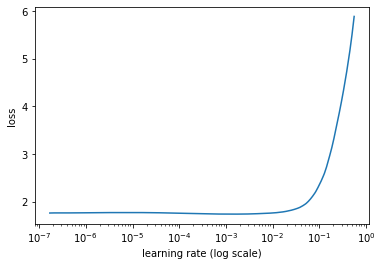

In [32]:
learner.lr_find(show_plot=True, max_epochs=1)

In [33]:
history = learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
352/352 [==============================] - 288s 771ms/step - loss: 1.5474 - accuracy: 0.3829 - val_loss: 1.2071 - val_accuracy: 0.5248
Epoch 2/4
352/352 [==============================] - 270s 763ms/step - loss: 1.0639 - accuracy: 0.6043 - val_loss: 1.0787 - val_accuracy: 0.5984
Epoch 3/4
352/352 [==============================] - 270s 763ms/step - loss: 0.6808 - accuracy: 0.7529 - val_loss: 1.0342 - val_accuracy: 0.6432
Epoch 4/4
352/352 [==============================] - 270s 763ms/step - loss: 0.3355 - accuracy: 0.8946 - val_loss: 1.0980 - val_accuracy: 0.6624


In [34]:
learner.validate(class_names=t.get_classes()) 

              precision    recall  f1-score   support

       anger       0.67      0.44      0.53        86
     disgust       0.66      0.81      0.73       139
        fear       0.78      0.75      0.76        95
         joy       0.70      0.64      0.67       118
     sadness       0.59      0.64      0.61       108
    surprise       0.59      0.59      0.59        79

    accuracy                           0.66       625
   macro avg       0.66      0.65      0.65       625
weighted avg       0.67      0.66      0.66       625



array([[ 38,  32,   1,   2,  11,   2],
       [  9, 113,   2,   7,   4,   4],
       [  1,   5,  71,   3,  10,   5],
       [  1,   8,   1,  76,  15,  17],
       [  6,  11,  10,   7,  69,   5],
       [  2,   2,   6,  14,   8,  47]])

In [38]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

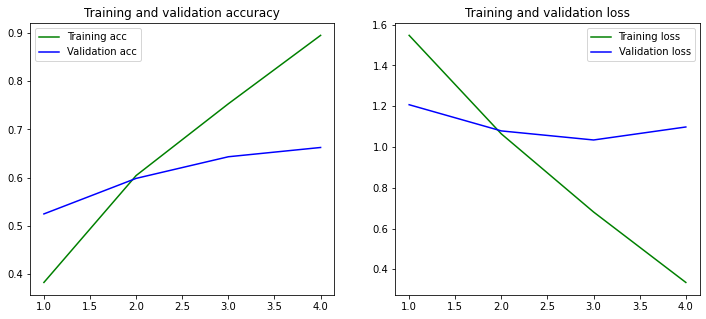

In [39]:
PlotGraph(history)